
#
1. Name: Gilbert Urinzwenimana
2. Andrew ID: gurinzwe
## Import libraries

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.preprocessing import LabelEncoder, StandardScaler,label_binarize
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, make_scorer
from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict

from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


import warnings
warnings.filterwarnings('ignore')

# PART A

# 1.
### Loading the data

In [31]:
loan_train = pd.read_csv('loan-train.csv')

### Examining loan dataset

In [32]:
# Displaying the shape of the dataset
loan_train.shape 

(614, 13)

### Displaying the names of columns and the first 5 rows of the dataset to see how the data looks like

In [33]:
# Displaying the features of the dataset
loan_train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [34]:
# Displaying the first 5 rows of the dataset to
loan_train.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [35]:
loan_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


This provide information about the number of Data column, number of entries and the data type of each column

### Dropping Loan_ID column as it is not required for the analysis

In [36]:
# Dropping Loan_ID column
loan_train.drop('Loan_ID', axis=1, inplace=True)

### Checking for missing values

In [37]:
loan_train.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### Insights
1. The presence of missing values highlights the need for data cleaning before any analysis.
2. The need for Analyzing the patterns of missing data to reveal if the missingness is random or if there are specific reasons behind it.(This can help us to know the strategy to fill the missing data)

# 2. Data Exploration tasks
#### Task to be done
1. Descriptive Statistics
2. Data Visualization
3. Correlation Analysis
4. Outlier Analysis


#### 1. Descriptive Statistics

In [38]:
# Displaying the summary statistics of the dataset
loan_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


## Insights
### Potential outliers
The maximum value of 81,000 units is significantly higher than the mean (5,403.46 units).this show that there is a potential outlier in the ApplicationIncome column.This is same also in CoapplicationIncome column, the difference between the max and mean is very high showing that there is a potential outlier in this column.
### Missing values
Count of LoanAmount and credit history columns are Less than the total number of rows. This shows that there are missing values in those columns.(Number of entries is 614 as we saw in the previous step)

### 2. Data Visualization

### checking data distribution in numerical columns

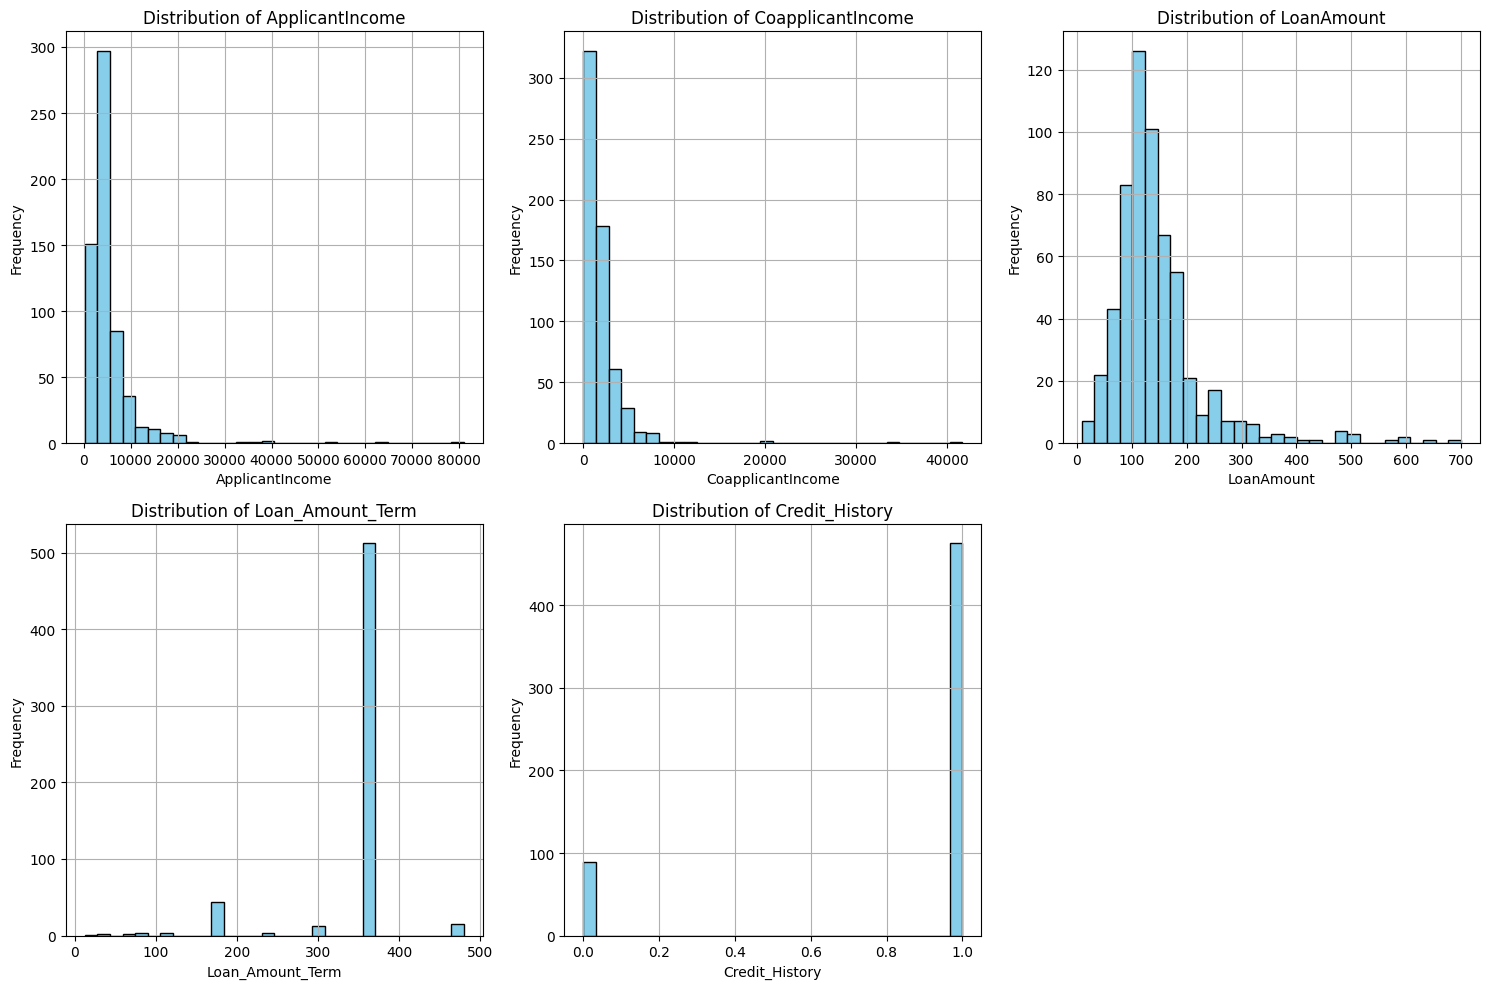

In [39]:
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

# Create histograms for numerical columns
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i) 
    loan_train[column].hist(bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

# Adjust layout and display the histograms
plt.tight_layout()
plt.show()

### Insights
1. ApplicantIncome: The distribution is right-skewed, indicating that most applicants have lower incomes, with a few having very high incomes.
2. CoapplicantIncome: This distribution is also right-skewed, with a significant number of coapplicants having little to no income.
3. LoanAmount: The histogram shows a right-skewed distribution, suggesting that most loans are of smaller amounts, with fewer larger loans.
4. Loan_Amount_Term: The majority of loans have a term of 360 months, indicating a common preference for long-term loans.
5. Credit_History: Most applicants have a good credit history (value of 1), with fewer having a poor credit history (value of 0).


### Checking value count in non-numerical columns

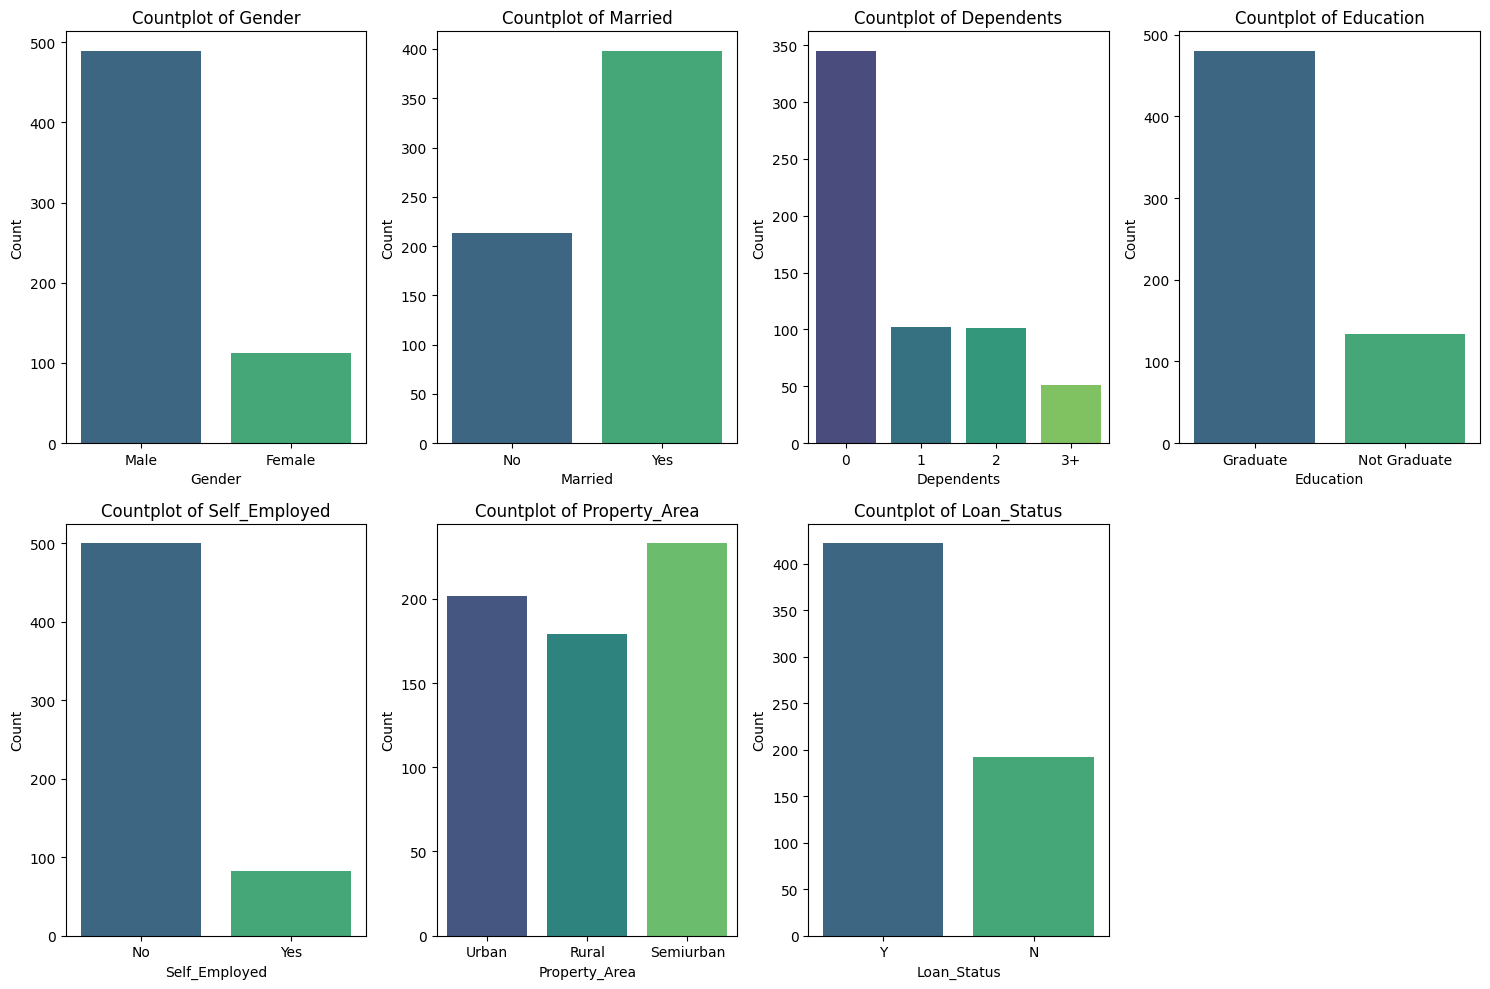

In [40]:
# List of non-numerical columns
non_numerical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']

# countplots for non-numerical columns
plt.figure(figsize=(15, 10))
for i, column in enumerate(non_numerical_columns, 1):
    plt.subplot(2, 4, i) 
    sns.countplot(data=loan_train, x=column, palette='viridis')
    plt.title(f'Countplot of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

### Interpretation:
These bar plots show the comparison of the count of each category in the non-numerical columns. It summarize large amounts of data into a visual format which can help in identifying patterns and trends during analysis.

### 3. Correlation Analysis

### correlation between numerical variables 

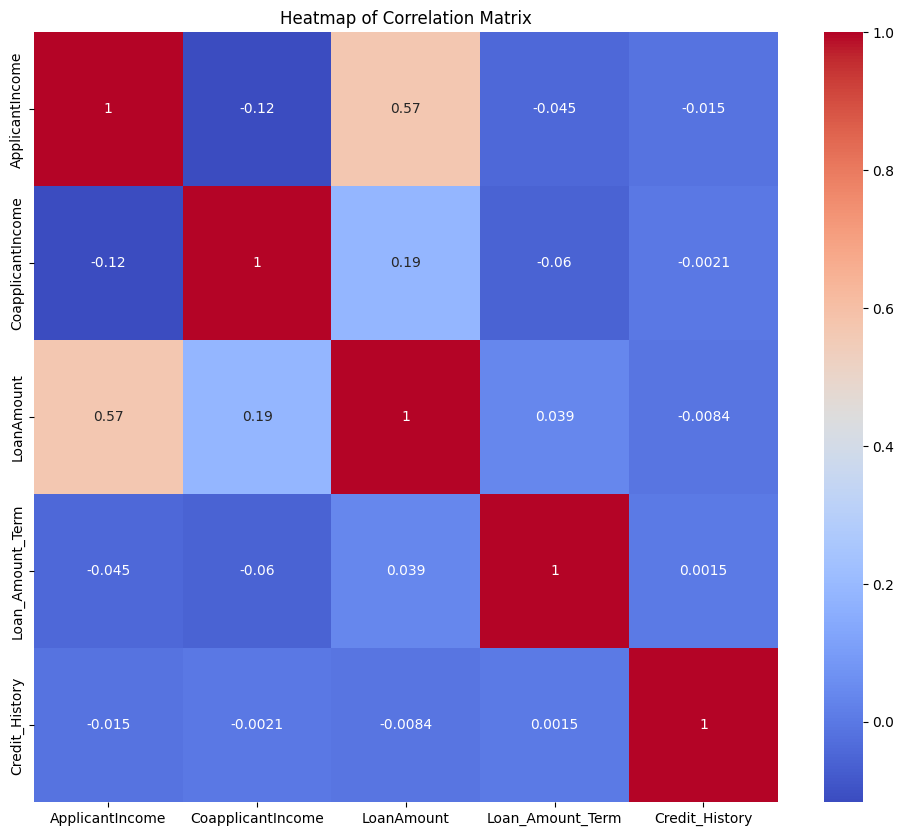

In [41]:
# correlation between all variables
corr_matrix = loan_train[numerical_columns].corr()

# heatmap of correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlation Matrix')
plt.show()

### interpretation 

Values closer to 1 indicate a strong positive correlation, meaning that as one variable increases, the other tends to increase significantly. Similarly, values closer to -1 indicate a strong negative correlation, where an increase in one variable corresponds to a significant decrease in the other.

For example:
1. There is a moderate positive correlation (0.57) between the 'ApplicantIncome' and 'LoanAmount' variables, indicating that higher applicant incomes are associated with higher loan amounts. 
2. Loan_Amount_Term shows almost no correlation with other variables, indicating it is relatively independent.

### 4. Outlier Analysis

### Outlier Analysis in numerical variables

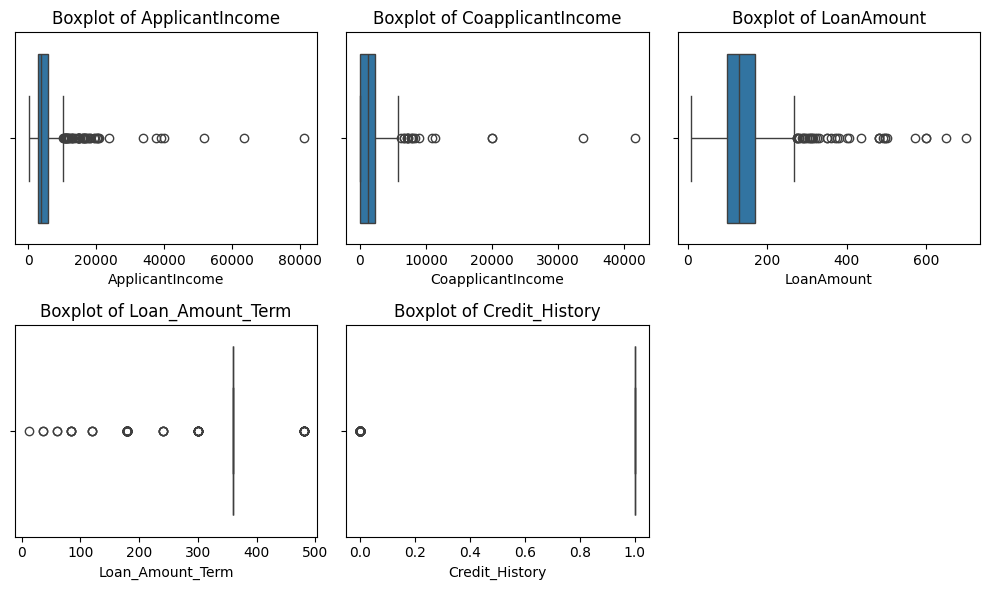

In [42]:

# Create boxplots for each numerical column
plt.figure(figsize=(10, 6))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)  # Adjust subplot grid
    sns.boxplot(data=loan_train, x=column)
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()


### Insights 

The income distribution shows that applicant income is highly skewed to the right, with a median of 5000-6000 and most incomes below 20,000, though some outliers reach 80,000. The incomes are generally similar, as seen from the compact interquartile range. Co-applicant income follows a similar pattern but with much lower values, a median near 0-1000, and outliers up to 40,000, indicating many may not earn or work part-time. Loan amounts are more symmetrically distributed, with a median of 150-200 and outliers above 400, showing greater variability. Loan terms are mostly concentrated around 360 months (30 years) with a few lower outliers, reflecting standardized options. Credit history is binary, heavily skewed towards 1, suggesting most applicants have a credit history with little variation.

# 3.Performing pre-processing on the data

#### a) Scaling and label encoding

#### The code below do the following:
1. encodes the categorical variables without encording the missing values.Missing values are handled in the next step.
2. scales the numerical variables to have zero mean and unit standard deviation.


In [43]:

# Label Encoding
columns_to_encode = ['Gender', 'Married', 'Dependents', 
                      'Self_Employed']

loan_train['Education']=loan_train['Education'].map({'Graduate':0, 'Not Graduate':1})
loan_train['Property_Area']=loan_train['Property_Area'].map({'Urban':0, 'Rural':1, 'Semiurban':2})
loan_train['Loan_Status']=loan_train['Loan_Status'].map({'Y':1, 'N':0})

for column in columns_to_encode:
    label = LabelEncoder()
    non_missing_mask = loan_train[column].notna()
    loan_train.loc[non_missing_mask, column] = label.fit_transform(loan_train.loc[non_missing_mask, column])



# Scaling
columns_to_scale = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

Scaler = StandardScaler()

#loan_train = Scaler.fit_transform(loan_train)

for column in columns_to_scale:
    non_missing_mask = loan_train[column].notna()
    loan_train.loc[non_missing_mask, column] = Scaler.fit_transform(loan_train.loc[non_missing_mask, column].values.reshape(-1, 1))




In [44]:
loan_train.sample(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
415,0,0,0,0,0,-0.394566,-0.554487,-1.010491,0.276642,1.0,0,1
38,1,0,0,0,0,-0.202727,1.911427,0.439547,0.276642,1.0,0,1
111,0,1,0,0,NaN,-0.405379,0.243429,-0.086677,0.276642,1.0,2,1
258,1,1,0,0,0,1.520223,0.163740,1.842809,0.276642,1.0,1,0
605,1,1,0,1,0,-0.492042,0.745163,NaN,-2.489775,1.0,0,0


### b) Handling missing values

### Analysis of imputation methods to handle missing values
1. Credit_History (50 missing, 8.14%): mode imputation
2. Self_Employed (32 missing, 5.21%): mode imputation it's likely categorical
3. LoanAmount (22 missing, 3.58%):median imputation due to presence of outliers
4. Loan_Amount_Term (14 missing, 2.28%):mode imputation
5. Dependents (15 missing, 2.44%):  mode imputation
6. Gender (13 missing, 2.12%):mode imputation
7. Married (3 missing, 0.49%): Mode 

Law used:

- Mode imputation for categorical variables
- Median imputation for continuous variables with outliers
- mean imputation for continuous variables without outliers


In [45]:
#imputation
loan_train['Credit_History'].fillna(loan_train['Credit_History'].mode()[0], inplace=True)
loan_train['Self_Employed'].fillna(loan_train['Self_Employed'].mode()[0], inplace=True)
loan_train['LoanAmount'].fillna(loan_train['LoanAmount'].median(), inplace=True)
loan_train['Loan_Amount_Term'].fillna(loan_train['Loan_Amount_Term'].mode()[0], inplace=True)
loan_train['Dependents'].fillna(loan_train['Dependents'].mode()[0], inplace=True)
loan_train['Gender'].fillna(loan_train['Gender'].mode()[0], inplace=True)
loan_train['Married'].fillna(loan_train['Married'].mode()[0], inplace=True)

In [46]:
loan_train.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### c) Handlling outliers

#### Before handling outliers

In [47]:
loan_train.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,6.140000e+02,6.140000e+02,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.744300,0.218241,0.133550,-4.339634e-18,4.050325e-17,-0.007715,0.006308,0.855049,1.050489,0.687296
std,0.386497,0.476373,1.009623,0.413389,0.340446,1.000815e+00,1.000815e+00,0.983538,0.990202,0.352339,0.840875,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,-8.606493e-01,-5.544873e-01,-1.606878,-5.071764,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,-4.138159e-01,-5.544873e-01,-0.539814,0.276642,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,-2.606393e-01,-1.480047e-01,-0.215309,0.276642,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,6.414426e-02,2.312023e-01,0.214440,0.276642,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,1.238462e+01,1.369617e+01,6.473575,2.120919,1.000000,2.000000,1.000000


Number of count= 614 

code below will remove outliers which fall away from 3 standard deviations from the mean

In [48]:
# by using Z-score with 99.7% confidence interval (mean ± 3*std) in numerical columns
z_scores = np.abs(stats.zscore(loan_train[numerical_columns]))
threshold = 3
loan_train = loan_train[(z_scores < threshold).all(axis=1)]

After handling outliers

In [49]:
loan_train.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000
mean,0.814558,0.649913,0.719237,0.227036,0.126516,-0.120811,-0.068553,-0.129399,0.092853,0.850953,1.048527,0.689775
std,0.388993,0.477411,0.995229,0.419280,0.332719,0.485816,0.564850,0.656898,0.796819,0.356444,0.838154,0.462987
min,0.000000,0.000000,0.000000,0.000000,0.000000,-0.860649,-0.554487,-1.606878,-2.489775,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,-0.421106,-0.554487,-0.542737,0.276642,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,-0.270878,-0.125261,-0.215309,0.276642,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,0.021058,0.216068,0.158894,0.276642,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,2.500553,2.516790,2.731542,2.120919,1.000000,2.000000,1.000000


count= 577 , the effect of removing outliers can also be seen by checking the difference between the mean and the max value but as the values are scaled it is not visible as before we scale.

# PART B

### 4) Creating models and comparing their performances

#### a) creating and train five models

In [50]:
# Initializing explanatory variables and target variable
X = loan_train.drop('Loan_Status', axis=1)
y = loan_train['Loan_Status']


### Function to create and train models

In [51]:

# Function to instantiate classifier
def create_classifier(model_type):
    if model_type == 'decision tree':
        return DecisionTreeClassifier()
    elif model_type == 'random forest':
        return RandomForestClassifier(n_estimators=87)
    elif model_type == 'knn':
        return KNeighborsClassifier(n_neighbors=10, weights='distance')
    elif model_type == 'neural network':
        return MLPClassifier(random_state=42)
    elif model_type == 'naive bayes':
        return GaussianNB()
    else:
        raise ValueError(f"Unknown model type: {model_type}")

# Function to evaluate classifier using cross-validation
def cross_validation(model, X, y):
    scores = cross_val_score(model, X, y, cv=10)
    return f'Cross-Validation mean accuracy: {scores.mean()}'

# Function to evaluate model using accuracy and Area under ROC curve
def evaluate_model(model, X, y):
    model.fit(X, y)
    y_pred = model.predict(X)
    roc_auc = roc_auc_score(y, y_pred)
    return f'Area under the curve: {roc_auc}'



1. Creating Decision Tree model

### Calling functions to create model and evaluate it

In [52]:
# List of models to test
models = ['decision tree', 'random forest', 'knn', 'neural network', 'naive bayes']

# Loop through models and evaluate
for model_type in models:
    model = create_classifier(model_type)  
    print(f"Model: {model_type}")
    print(cross_validation(model, X, y)) 
    print(evaluate_model(model, X, y))  
    print()


Model: decision tree
Cross-Validation mean accuracy: 0.7523290986085904
Area under the curve: 1.0

Model: random forest
Cross-Validation mean accuracy: 0.8025105868118573
Area under the curve: 1.0

Model: knn
Cross-Validation mean accuracy: 0.7556261343012703
Area under the curve: 1.0

Model: neural network
Cross-Validation mean accuracy: 0.8163339382940109
Area under the curve: 0.7484700036495325

Model: naive bayes
Cross-Validation mean accuracy: 0.8146400483968541
Area under the curve: 0.7159259987086269



### b) Creating a bar graph to compare the performance of the models

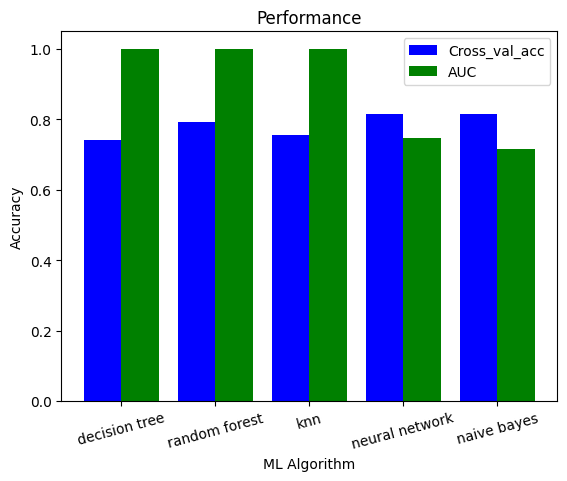

In [53]:

# Function to plot multi-series bar chart
def plot_multiseries_bar():
    model_types = ['decision tree', 'random forest', 'knn', 'neural network', 'naive bayes']
    
    # creating list of accuracies and AUC
    Cross_val_acc = np.array([cross_validation(create_classifier(model), X, y) for model in model_types])
    Auc = np.array([evaluate_model(create_classifier(model), X, y) for model in model_types])
    
    # Extract numeric part
    Cross_val_acc = [float(val.split(":")[1]) for val in Cross_val_acc]  # Extract numeric part
    Auc = [float(val.split(":")[1]) for val in Auc]  # Extract numeric part
    
    # Plotting
    bw = 0.4 
    x = np.arange(len(model_types)) 
    plt.title("Performance")
    plt.ylabel('Accuracy')
    plt.xlabel('ML Algorithm')
    plt.xticks(x, model_types, rotation=15)
    plt.bar(x - bw / 2, Cross_val_acc, bw, label='Cross_val_acc', color='blue')
    plt.bar(x + bw / 2, Auc, bw, label='AUC', color='green')
    
    plt.legend()
    plt.show()

plot_multiseries_bar()


### c) i) insights

1. Neural network and naive bayes tend to have the same performance on this dataset but naive is lower than neural network.This suggest that the neural network is the best model for this dataset when compared to naive bayes. Random forest is somewhere below the neural network and naive bayes.
2. Decisin tree and KNN have the lowest performance on this dataset. This suggest that decision tree and KNN are not the best models for this dataset.

###  ii) Based on cross validation result , the recommended algorithm for this dataset is "neural network".

# 5.Feature selection

In [54]:

# Calculate mutual information between each feature and the target
mutual_info = mutual_info_classif(X, y)
#selecting the top k features based on mutual information
k=5

selector = SelectKBest(score_func=mutual_info_classif, k=k)
X_selected = selector.fit_transform(X, y)

# Displating the selected features
selected_features = X.columns[selector.get_support()]
print('Selected features:', selected_features)


Selected features: Index(['Gender', 'Education', 'Self_Employed', 'Credit_History',
       'Property_Area'],
      dtype='object')


### a)Models with selected features

### The function to create and evaluate a models was created in previous step, so we can use it here for selected features as well.

In [55]:
# List of models to test
X_selected = selector.fit_transform(X, y)
y=y

models = ['decision tree', 'random forest', 'knn', 'neural network', 'naive bayes']

# Loop through models and evaluate
for model_type in models:
    model = create_classifier(model_type)  
    print(f"Model: {model_type}")
    print(cross_validation(model, X_selected, y)) 
    print(evaluate_model(model, X_selected, y))  
    print()

Model: decision tree
Cross-Validation mean accuracy: 0.8042649727767694
Area under the curve: 0.7403708486566913

Model: random forest
Cross-Validation mean accuracy: 0.8094676346037508
Area under the curve: 0.7372968192919906

Model: knn
Cross-Validation mean accuracy: 0.7121899576527526
Area under the curve: 0.7183613598719857

Model: neural network
Cross-Validation mean accuracy: 0.8180883242589232
Area under the curve: 0.7258429016591337

Model: naive bayes
Cross-Validation mean accuracy: 0.8181488203266788
Area under the curve: 0.7159259987086269



### b) Comparison of models

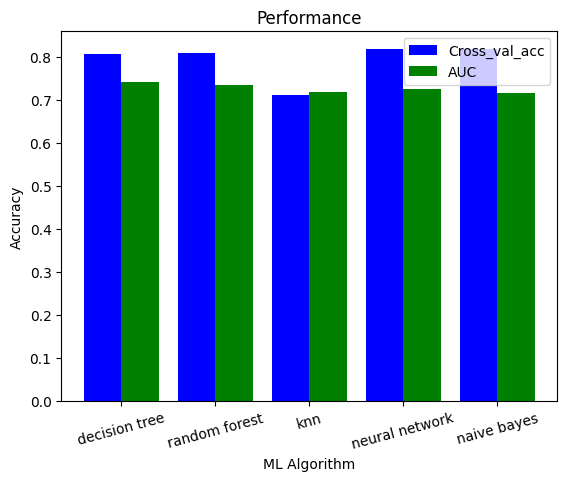

In [56]:

# Function to plot multi-series bar chart
def plot_multiseries_bar():
    model_types = ['decision tree', 'random forest', 'knn', 'neural network', 'naive bayes']
    
    # creating list of accuracies and AUC
    Cross_val_acc = np.array([cross_validation(create_classifier(model), X_selected, y) for model in model_types])
    Auc = np.array([evaluate_model(create_classifier(model), X_selected, y) for model in model_types])
    
    # Extract numeric part
    Cross_val_acc = [float(val.split(":")[1]) for val in Cross_val_acc]  # Extract numeric part
    Auc = [float(val.split(":")[1]) for val in Auc]  # Extract numeric part
    
    # Plotting
    bw = 0.4 
    x = np.arange(len(model_types)) 
    plt.title("Performance")
    plt.ylabel('Accuracy')
    plt.xlabel('ML Algorithm')
    plt.xticks(x, model_types, rotation=15)
    plt.bar(x - bw / 2, Cross_val_acc, bw, label='Cross_val_acc', color='blue')
    plt.bar(x + bw / 2, Auc, bw, label='AUC', color='green')
    
    plt.legend()
    plt.show()

plot_multiseries_bar()


### c) i)
Although the accuracy seems low for all the models, Neural Networks and Naive Bayes appear to be the best-performing algorithms in this case, with Random Forest coming in a close second. Decision Trees and KNN also perform reasonably well, but not as well as the top performers.

### ii) According to the bar chart and the best performing models, is naive bayes. 

### 6) Comments on insights gained from the comparison of analysis results before and after feature selection.

Feature selection had mixed effects on the models. It slightly increased accuracy for Decision Tree, KNN, and Naive Bayes but reduced accuracy a little for Random Forest and Neural Network. Most models saw a drop in AUC, showing they became less able to separate classes, except for KNN, which improved in both accuracy and AUC. Naive Bayes stayed mostly the same, with a small improvement in accuracy and no change in AUC. In summary, feature selection helped accuracy in some cases but often reduced the models’ ability to tell classes apart.

### 7) Hyperparameter tuning for the best performing model.

1. In question 4, the best performing model was Neural nework
2. In question 5, the best performing model was naive bayes

1. Tuning the parameters of neural network.

Independent variables: this model performed better with all features.

In [57]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = MLPClassifier(random_state=42, max_iter=500)

# Define the parameter distribution
param_dist = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50), (100, 100)],
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['adam', 'sgd'],
    'alpha': [1e-5, 1e-4, 1e-3],
    'learning_rate_init': [0.0001, 0.001, 0.01]
}

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=20, cv=3, scoring='accuracy', random_state=42)
random_search.fit(X, y)

# Get the best parameters and test accuracy
best_model = random_search.best_estimator_
y_pred = best_model.predict(X)

print("Best Parameters:", random_search.best_params_)
print("Best Training Accuracy:", random_search.best_score_)
print("Test Accuracy:", accuracy_score(y, y_pred))


Best Parameters: {'solver': 'adam', 'learning_rate_init': 0.0001, 'hidden_layer_sizes': (100, 100), 'alpha': 0.001, 'activation': 'tanh'}
Best Training Accuracy: 0.8145599453080022
Test Accuracy: 0.8214904679376083


### Comparing the perfomance after the optimization with the performance before the optimization(same algorithm in 4 and 5) 

#### Neuron Network
1. Accuracy before optimization(with all features): 0.8163339382940109
2. Accuracy before optimization( selected features):0.8111615245009075
3. Accuracy after optimization:0.8214904679376083

##### Insights
Before the feature selection the accuracy was 0.816, after feature selection it reduced to 0.811, and after optimization it improved to 0.821. This shows that feature selection has removed important feature while optimization of the parameters of the algorithm improved the accuracy of the model.

2) Tuning the parameters of naive bayes.
 
Independent variables: from feature selection, as this model performed better with selected features.

In [58]:

# Define the model
model = GaussianNB()

# Define the parameter grid
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

# Perform grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_selected, y)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Evaluate the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_selected)
print("Accuracy:", accuracy_score(y, y_pred))
#print("Confusion Matrix:\n", confusion_matrix(y, y_pred))


Best Parameters: {'var_smoothing': 1e-09}
Best Score: 0.8180809595202397
Accuracy: 0.8180242634315424


#### Naive Bayes
1. Accuracy before optimization(with all features): 0.8146400483968541
2. Accuracy before optimization( selected features): 0.8181488203266788
3. Accuracy after optimization: 0.8180242634315424


As it can be seen from the results, the accuracy has increased  slighly after feature selection from 0.8146 to 0.8181. This suggest that the feature selection has improved the performance of the model.However, after tuning the hyperparameters, the accuracy has reduced to 0.8180,which suggest that hyperparameter tuning has removed some important feature in the data.

# PART C: Report